# Plot the spectrum files from DRAGONS 
This notebooks serves as a nice sanity check to visualize the spectrum from files obtained through the DRAGONS data reduction pipeline before continuuing with the normalization. Can plot the two (or three IFUs)

In [1]:
import numpy as np
import os 
import glob

import matplotlib.pyplot as plt
import itertools
import sys

%matplotlib notebook

# ----------------- Import the other files of functions
module_path = os.path.join('/astro/adovgal/GHOULS_DATA/FIXER_1/asap_lib/')
if module_path not in sys.path:
    sys.path.append(module_path)

import spectra as sa

In [29]:
# Indicate the object and confirm file path. If GHOST data from DRAGONS, leave 'num' and 'end' as they are. 
# S20240504S0241_blue001_dragons_001.dat
# aqu2_sr_2x4_br1800s300_20220629_red001_dragons_002.dat

star = 'S20240703S0044'
num  = '_001'        
end  = '_dragons' + num  

path =  f'/astro/adovgal/GHOULS_DATA/'    
fipath = path  + f'{star}/'
#fipath = path  + f'GHOST_ObsData/Sag2_936_A/'
spath = fipath #+ star           

In [23]:
# ---------- There should be (theoretically) nothing to change in the following cell 

for camera in ['blue', 'red']:
    
    naming = '*{}*'+ end + '.dat'
    condition = naming.format(camera)
    obs = glob.glob(spath+condition)
    
    print('Found {} exposures to combine: '.format(len(obs)))
    print( * obs, sep = "\n")

    # --------------------------------
    waves  = []
    fluxes = []
    varian = []

    for item in obs:
        wave, flux, var = sa.read_spec(item, ftype ='xyz')

        waves.append(wave)
        fluxes.append(flux)
        varian.append(var)
    
    # --------------------------------
    pairs =  list(itertools.combinations(range(len(waves)), 2))

    for pair in pairs:
        value = np.array_equal(waves[pair[0]], waves[pair[1]])
        if value == False:
            print('Wavelength arrays not equivalent. Do not proceed')
            break

    if len(waves) > 0:
        # -------------------------------- Median Combine flux and combine error with Poisson statistics 
        finalWave = waves[0]
        finalFlux = np.median(fluxes,axis = 0)
        #finalErr = np.zeros(len(finalWave))
        finalErr = np.sqrt( sum(i*i for i in varian) ) / len(waves)

        # -------------------------------- Save the output as .xyz and .bin files 
        sa.write2xyz(finalWave, finalFlux, finalErr, spath +num+'_{}'.format(camera))
        sa.write2bin(finalWave, finalFlux, finalErr, spath +num+'_{}'.format(camera))

        print('Saved combination of {} {} camera images'.format(len(waves), camera))
        # --------------------------------

    else:
        print('No {} camera files found'.format(camera))


Found 1 exposures to combine: 
/astro/gto/Desktop/tcornejo/FIXER_1/GHOST_ObsData/Sag2_936_A/S20240703S00-69&70_blue001_dragons_001.dat
Saved combination of 1 blue camera images
Found 1 exposures to combine: 
/astro/gto/Desktop/tcornejo/FIXER_1/GHOST_ObsData/Sag2_936_A/S20240703S00-69&70_red001_dragons_001.dat
Saved combination of 1 red camera images


In [30]:
ftyp = 'xyz'
blue_spec_filename1  = spath + f'_001_blue.{ftyp}'   
red_spec_filename1   = spath + f'_001_red.{ftyp}' 

blue_spec_filename2  = spath +f'_002_blue.{ftyp}'   
red_spec_filename2   = spath +f'_002_red.{ftyp}' 

#blue_spec_filename3  = fipath + 'S20240703S0070'+f'_001_blue.{ftyp}'   
#red_spec_filename3   = fipath + 'S20240703S0070'+f'_001_red.{ftyp}' 

blue1 = np.genfromtxt(blue_spec_filename1, dtype = None, encoding = None, names = True)
red1  = np.genfromtxt(red_spec_filename1,  dtype = None, encoding = None, names = True)

blue2 = np.genfromtxt(blue_spec_filename2, dtype = None, encoding = None, names = True)
red2  = np.genfromtxt(red_spec_filename2,  dtype = None, encoding = None, names = True)

#blue3 = np.genfromtxt(blue_spec_filename3, dtype = None, encoding = None, names = True)
#red3  = np.genfromtxt(red_spec_filename3,  dtype = None, encoding = None, names = True)

<IPython.core.display.Javascript object>


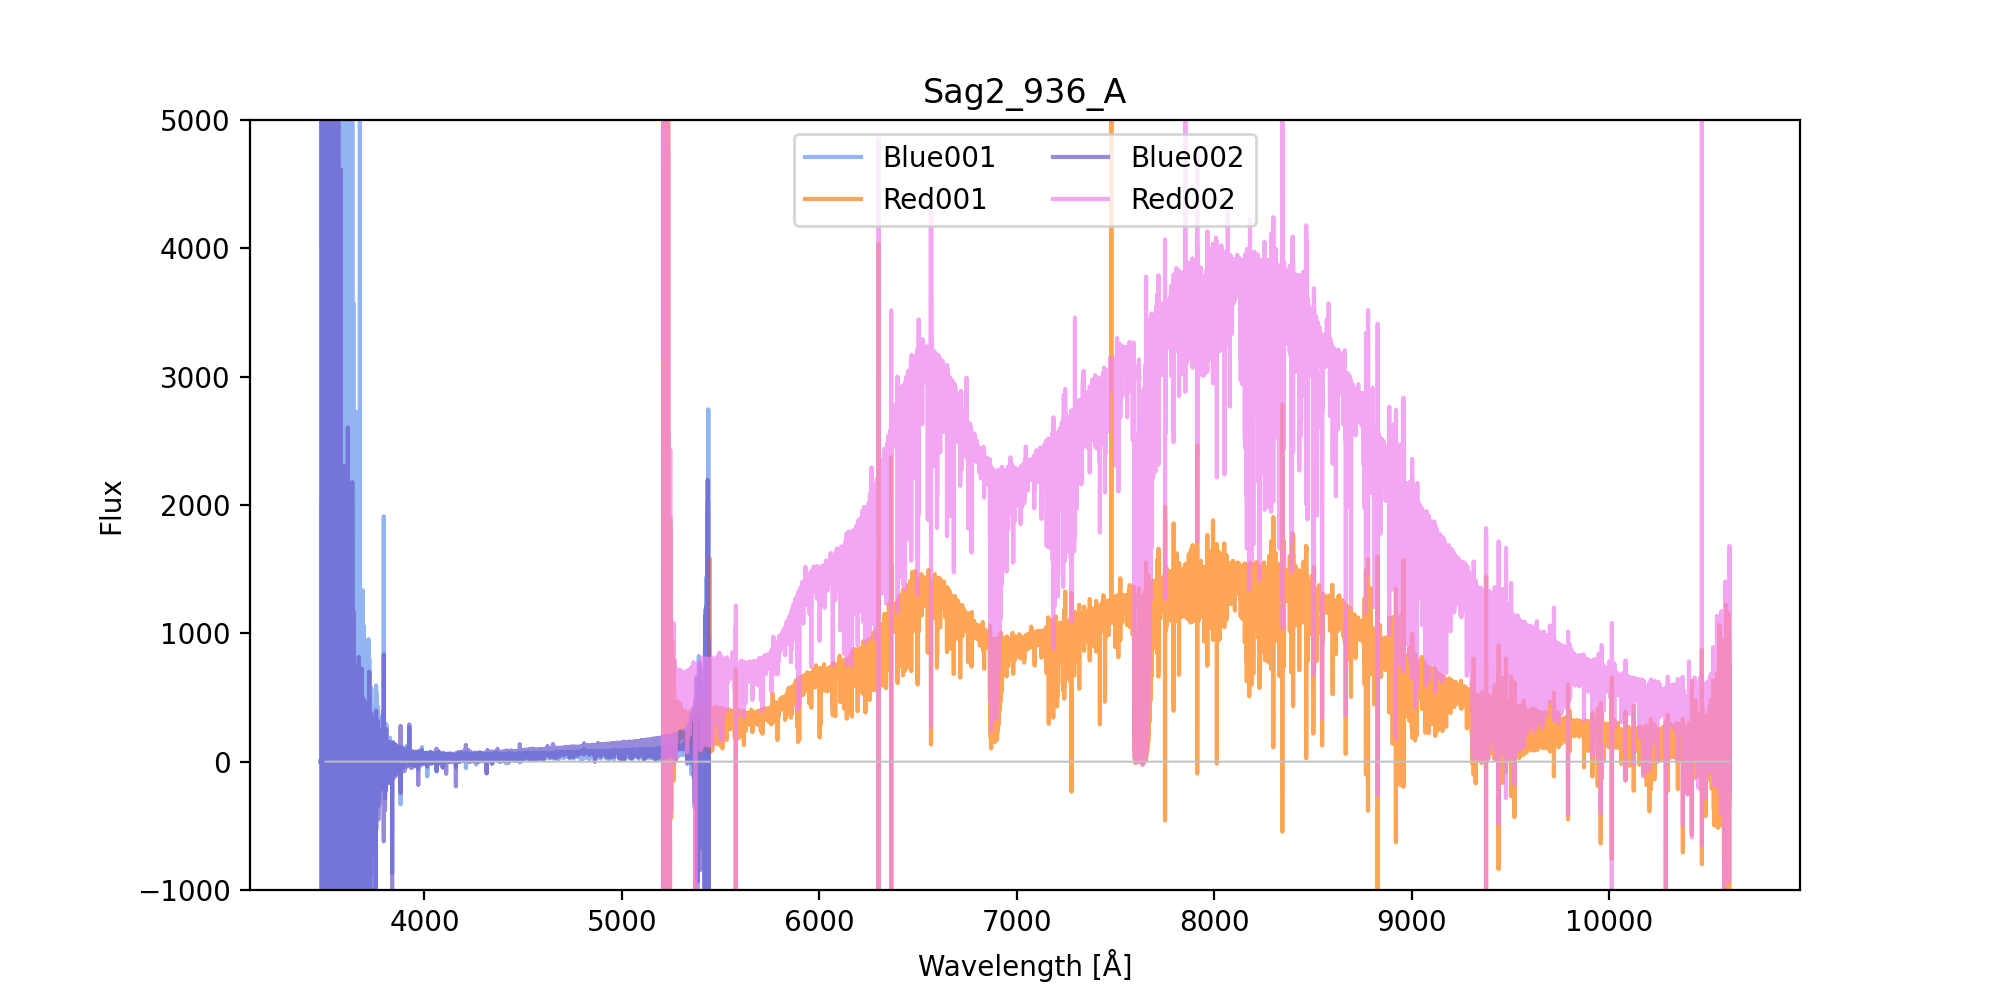

In [32]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
x = np.linspace(3500,max(red1['wavelength']),len(red1['wavelength']))

plt.plot(blue1['wavelength'],blue1['flux'],c="cornflowerblue",alpha=0.7,label="Blue001")
plt.plot(red1['wavelength'],red1['flux'],c="tab:orange",alpha=0.7,label="Red001")

plt.plot(blue2['wavelength'],blue2['flux'],c="slateblue",alpha=0.7,label="Blue002")
plt.plot(red2['wavelength'],red2['flux'],c="violet",alpha=0.7,label="Red002")

#plt.plot(blue3['wavelength'],blue3['flux'],c="cornflowerblue",alpha=0.7,label="Blue003")
#plt.plot(red3['wavelength'],red3['flux'],c="orange",alpha=0.7,label="Red003")
    
plt.title('Sag2_936_A')
plt.xlabel('Wavelength [Å]')
plt.ylabel('Flux')
plt.plot(x,x*0,c="silver",linewidth=0.7)                
plt.ylim(-1000,5000)
plt.legend(loc='upper center',ncol=2)

---
# Flatten fits to xyz

In [2]:
Path = '/astro/adovgal/GHOULS_DATA/'
obj  = 'Boo2_272_A'
fullpath = Path + obj + '/'

File = fullpath + obj + '_normrv.fits'

ftyp = 'cfits'
w, f = sa.read_spec(File, ftype = ftyp)
#w,f,e = sa.read_spec(File, ftype = ftyp)

w_min = 3700
w_max = 9500
ind = np.where( (w >= w_min) & (w <= w_max ) )[0]
wave = w[ind]
flux = np.array(f[ind].flatten(), dtype='float32')
#error = np.array(e[ind].flatten(), dtype='float32')

In [3]:
save_path = fullpath + obj +'_normrv'
sa.write2xy(wave,flux, save_path )
#sa.write2xyz(wave,flux, save_path )